<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.ticker as mticker
import seaborn as sns
import requests
from tqdm.notebook import tqdm
from urllib.parse import urlparse

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Step 2: Load the Dataset


In [2]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
data_name = urlparse(data_url).path.strip('/').split('/')[-1]

In [3]:
# Load the Stack Overflow survey dataset
df = pd.read_csv("survey-data_lab-14-cleaned.csv")

# Display the first few rows of the dataset
df.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceLevel,Country_Standardised,Continent,LanguageHaveWorkedWith_list,Age_median
0,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,3,1.0,Data scientist or machine learning specialist,100 to 499 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Integrated developer commun...,Pakistan,PKR\tPakistani rupee,2040000.0,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,C#;Rust;Scala,NaN,MongoDB;MySQL;SQLite,BigQuery;Cassandra;Databricks SQL;Elasticsearc...,NaN,Microsoft Azure;VMware,Amazon Web Services (AWS);Databricks;Google Cloud,NaN,Angular;AngularJS;Express;FastAPI;Flask;jQuery...,Django,NaN,CMake,NaN,NaN,Apache Kafka;Apache Spark;CUDA;Hadoop;Hugging ...,CUDA;mlflow;TensorFlow;Torch/PyTorch,CUDA;TensorFlow;Torch/PyTorch,Docker;Homebrew;Pip,Docker,Docker,IntelliJ IDEA;IPython;Jupyter Notebook/Jupyter...,NaN,NaN,MacOS;Windows,NaN,GitHub Discussions;Markdown File,NaN,NaN,Discord;Google Meet;Slack;Whatsapp;Zoom,NaN,NaN,ChatGPT;GitHub Copilot;Google Gemini;Visual St...,Meta AI,NaN,Stack Overflow;Stack Exchange,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat",Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,"Good, but not great at handling complex tasks",Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Committing and r...,NaN,Learning about a codebase;Writing code;Documen...,NaN,NaN,NaN,NaN,No,Circulating misinformation or disinformation;M...,"AI tools lack context of codebase, internal a...",Yes,People manager,3.0,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,1-2 times a week,6-10 t

<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [4]:
df["ConvertedCompYearly"]

0          7322.0
1         91295.0
2        110000.0
3        161044.0
4        195000.0
5         79481.0
6        170000.0
7         29000.0
8         66592.0
9         85925.0
10       124840.0
11        50000.0
12        85000.0
13       160000.0
14       161783.0
15       146496.0
16        69814.0
17       115000.0
18        64570.0
19        52122.0
20        54777.0
21        27926.0
22       107406.0
23        37297.0
24        85925.0
25       140000.0
26       213840.0
27       200000.0
28        93000.0
29        67227.0
30       144998.0
31        59073.0
32       119943.0
33       100000.0
34        14142.0
35       102000.0
36          650.0
37       136000.0
38        48333.0
39        53703.0
40       175000.0
41        85925.0
42        31200.0
43        55851.0
44       130000.0
45        90221.0
46         3618.0
47       150000.0
48        13160.0
49       160000.0
50         2411.0
51        50340.0
52        49681.0
53       100000.0
54        16532.0
55       2

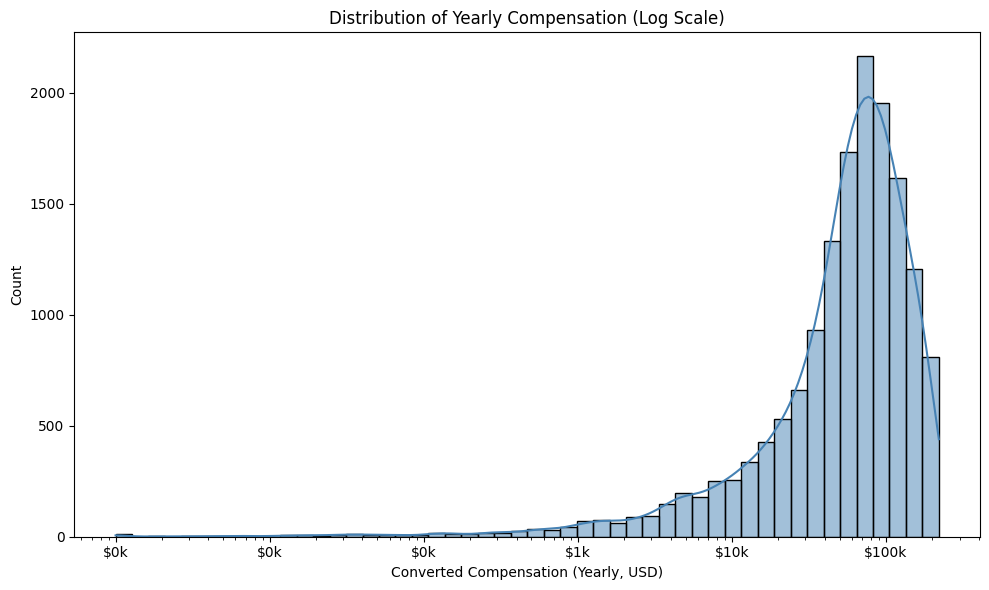

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='ConvertedCompYearly',
    bins=50,
    kde=True,
    color='steelblue',
    log_scale=True
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    mticker.FuncFormatter(
        lambda x, _: (
            f'${x/1e3:.0f}k' if x < 1e6 else f'${x/1e6:.1f}M'
        )
    )
)

plt.xlabel('Converted Compensation (Yearly, USD)')
plt.ylabel('Count')
plt.title('Distribution of Yearly Compensation (Log Scale)')
plt.tight_layout()

plt.savefig("Lab 15 - Step 3 Histplot Log")
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [6]:
full_timers_median = df.loc[df['Employment'] == "Employed, full-time", "ConvertedCompYearly"].median()
print(f"Median Compensation of Full-Time Employed Respondents: ${full_timers_median:,.2f}")

Median Compensation of Full-Time Employed Respondents: $67,602.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [12]:
country_map = {
    "Republic of Korea":"South Korea",
    "United Kingdom of Great Britain and Northern Ireland":"United Kingdom",
    "Congo, Republic of the...":"Republic of the Congo",
    "Democratic People's Republic of Korea":"North Korea",
    "Hong Kong (S.A.R.)":"Hong Kong",
    "Iran, Islamic Republic of...":"Iran",
    "Republic of North Macedonia":"North Macedonia",
    "Republic of Moldova":"Moldova",
    "United States of America":"USA",
    "Venezuela, Bolivarian Republic of...":"Venezuela",
    "United Republic of Tanzania":"Tanzania",
    "Syrian Arab Republic":"Syria",
    "Russian Federation":"Russia",
    "Libyan Arab Jamahiriya":"Libya",
    "Lao People's Democratic Republic":"Laos",
    "United Arab Emirates":"UAE"
}
df["Country"] = df["Country"].replace(country_map)
# df["Country"].value_counts().sort_index()

In [14]:
len(df["Country"].unique())

155

In [24]:
order = (
    df.groupby('Country')['ConvertedCompYearly']
    .median()
    .sort_values(ascending=False)
    .index
    .to_list()
)

group1={"0:9":order[0:9]}
group2={"10:19":order[10:19]}
group3={"20:29":order[20:29]}
group4={"30:39":order[30:39]}
group5={"40:49":order[40:49]}
group6={"50:59":order[50:59]}
group7={"60:69":order[60:69]}
group8={"70:79":order[70:79]}
group9={"80:89":order[80:89]}
group10={"90:99":order[90:99]}
group11={"100:109":order[100:109]}
group12={"110:119":order[110:119]}
group13={"120:129":order[120:129]}
group14={"130:139":order[130:139]}
group15={"140:149":order[140:149]}
group16={"150:154":order[150:154]}

In [25]:
group_label, countries = list(group1.items())[0]
print(group_label)
print(countries)

0-9
['Andorra', 'USA', 'Israel', 'Nomadic', 'Switzerland', 'Luxembourg', 'Ireland', 'Australia', 'Haiti']


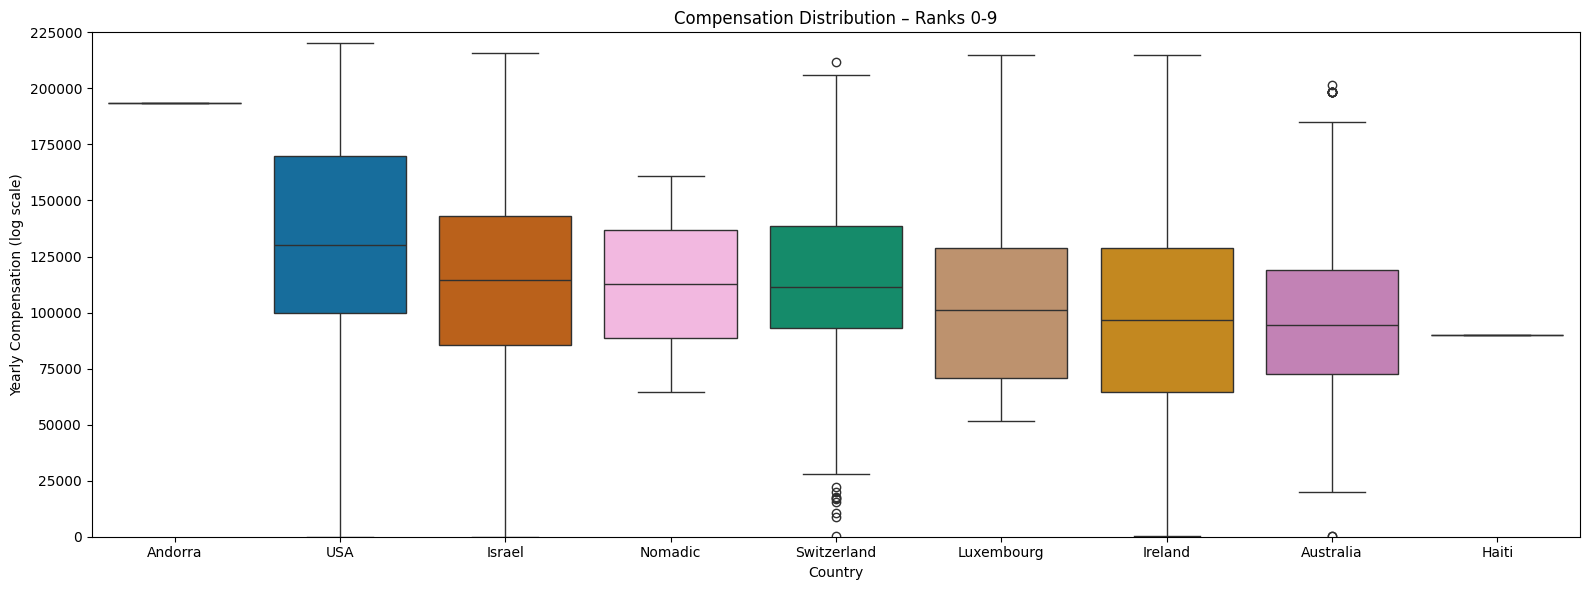

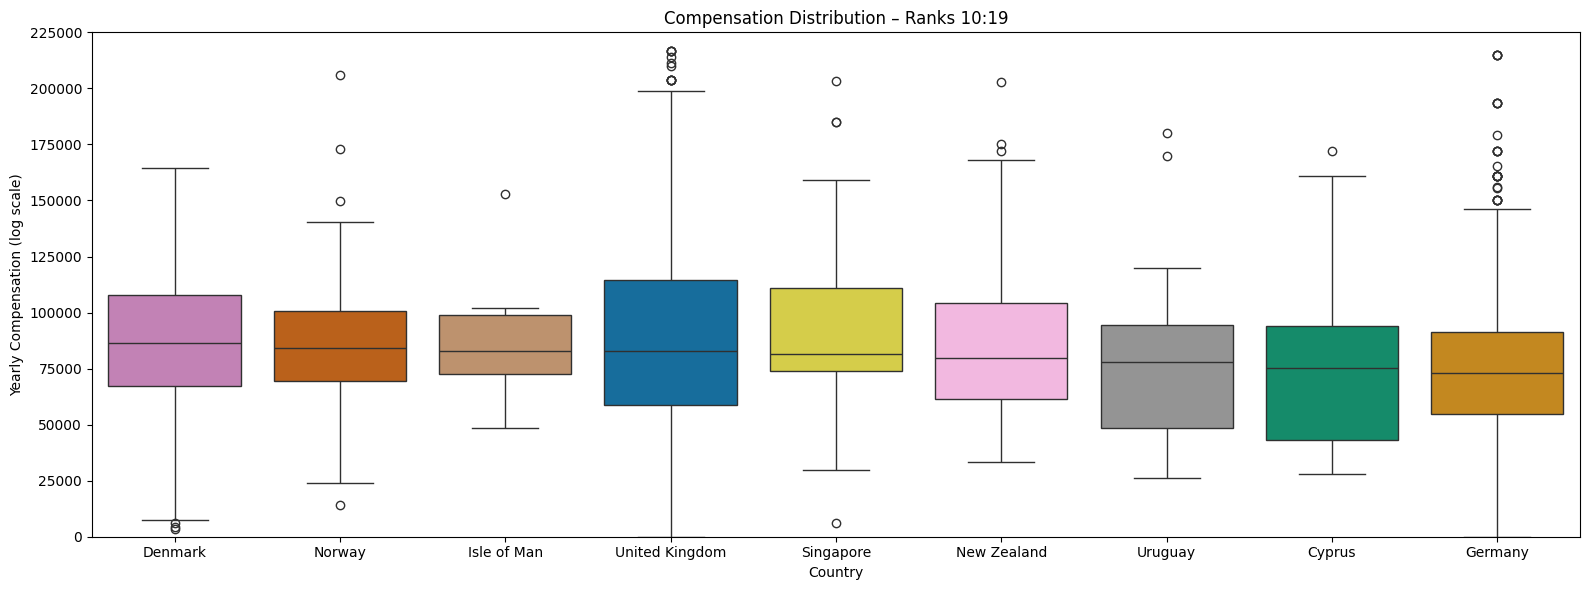

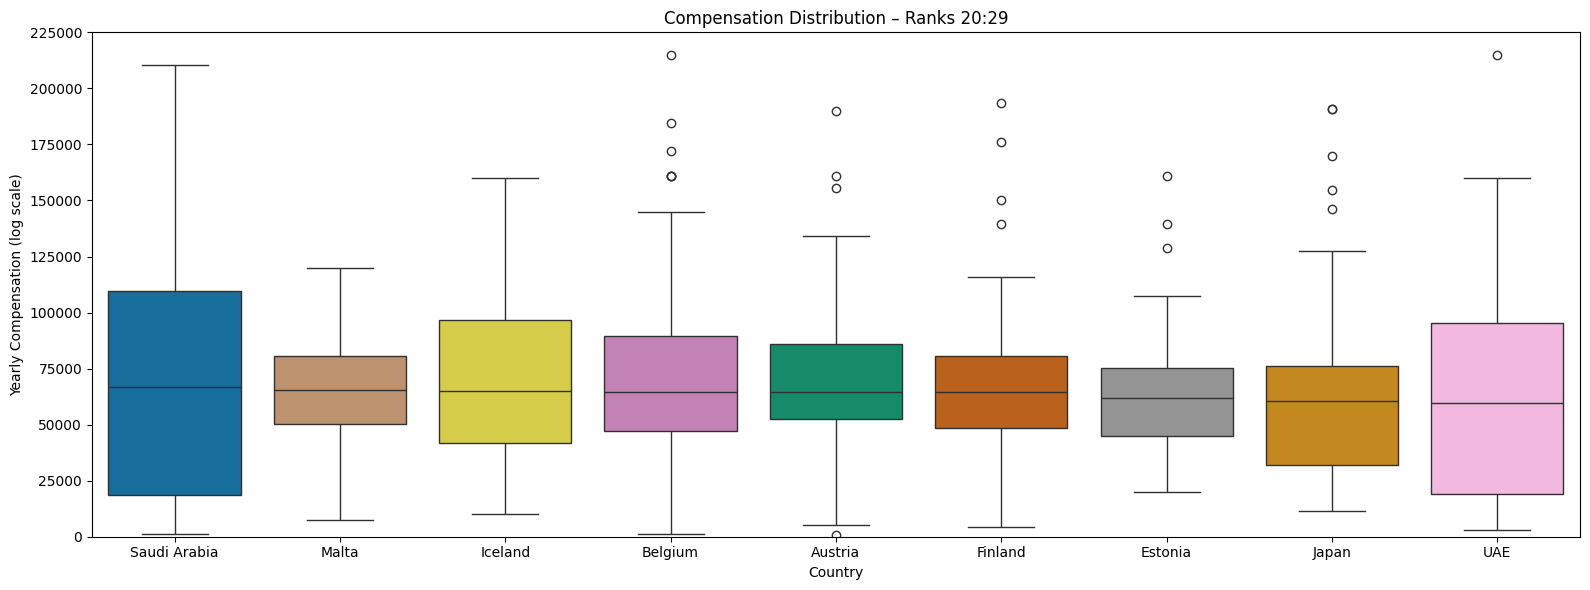

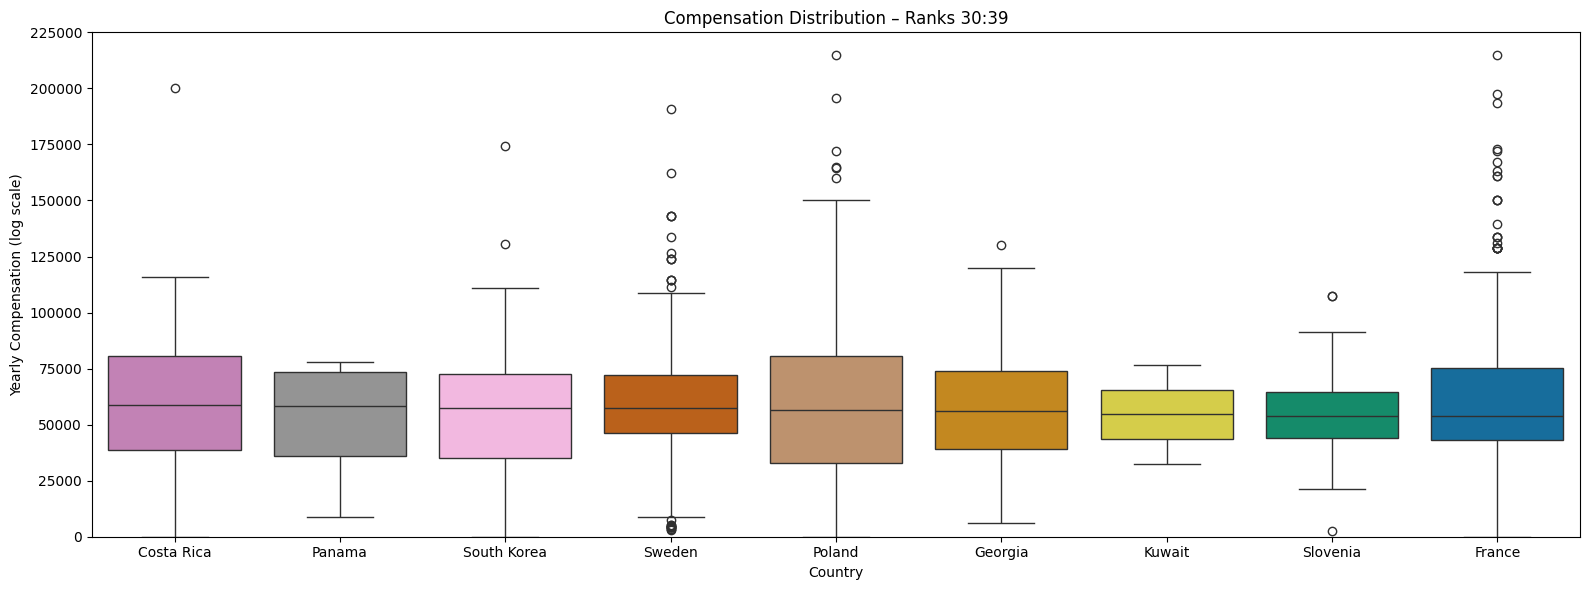

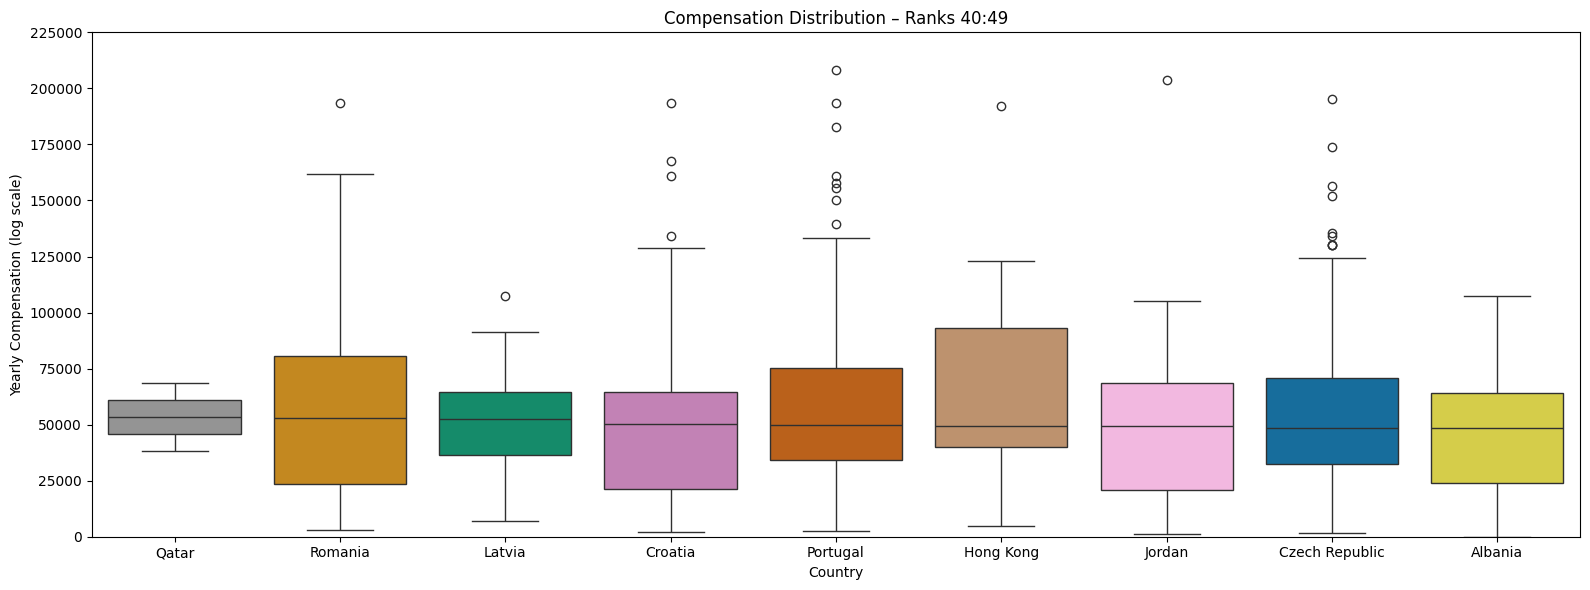

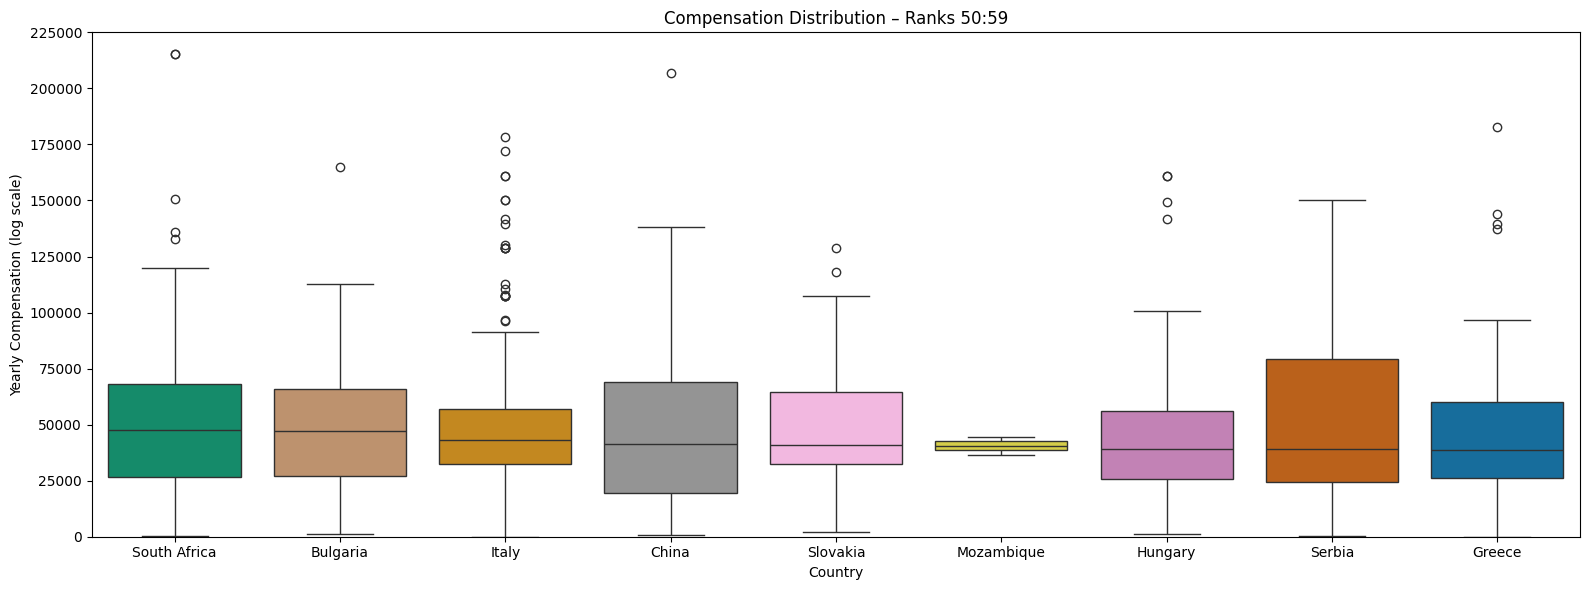

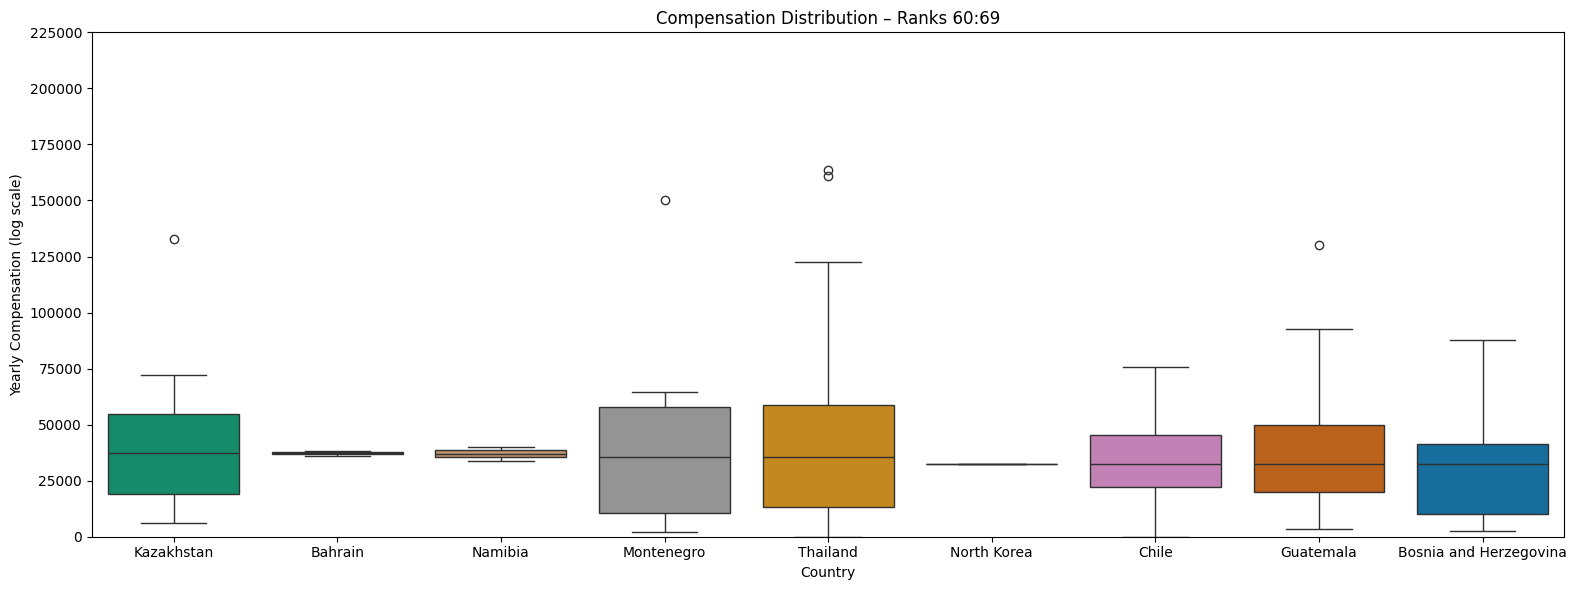

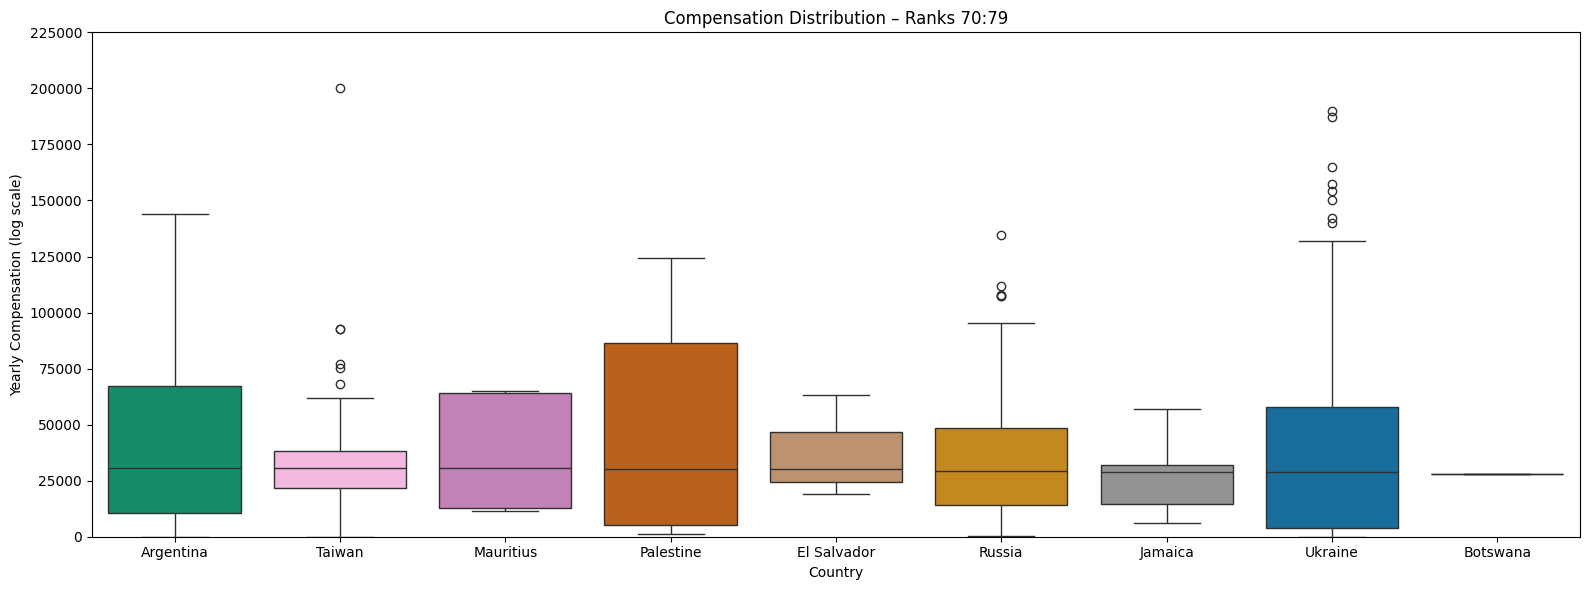

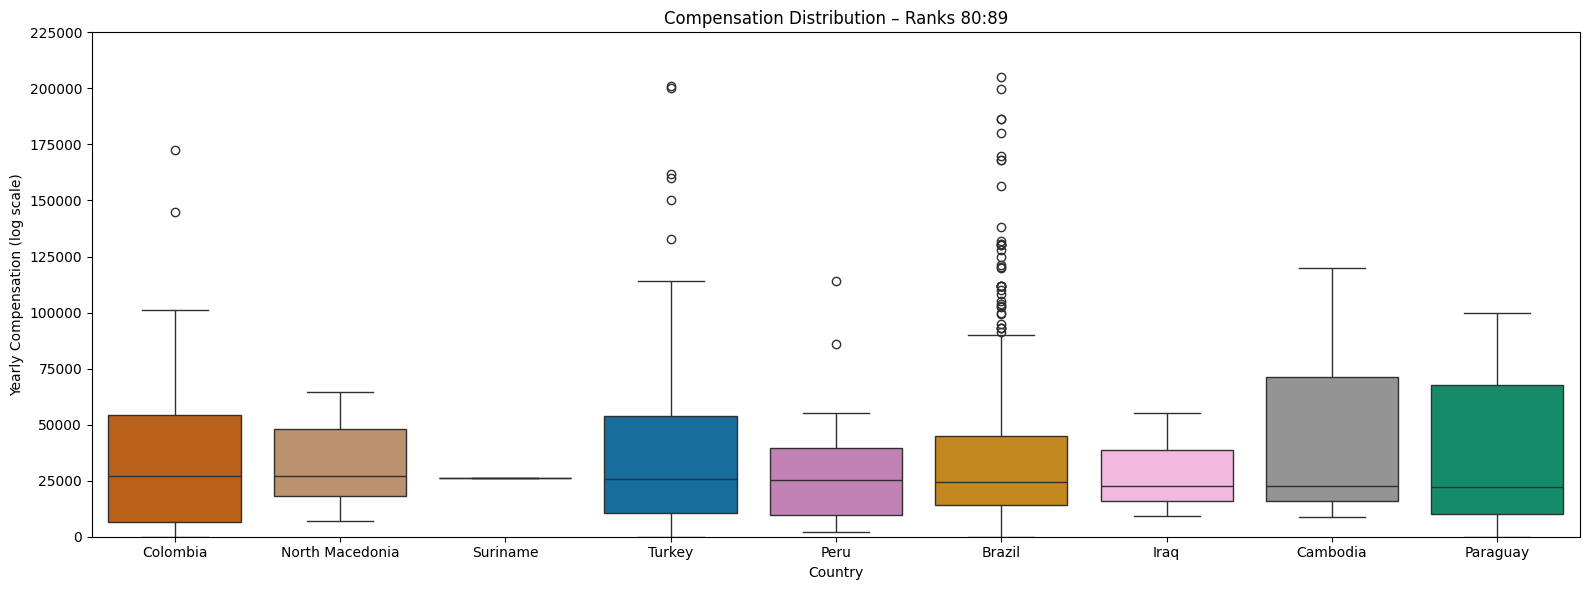

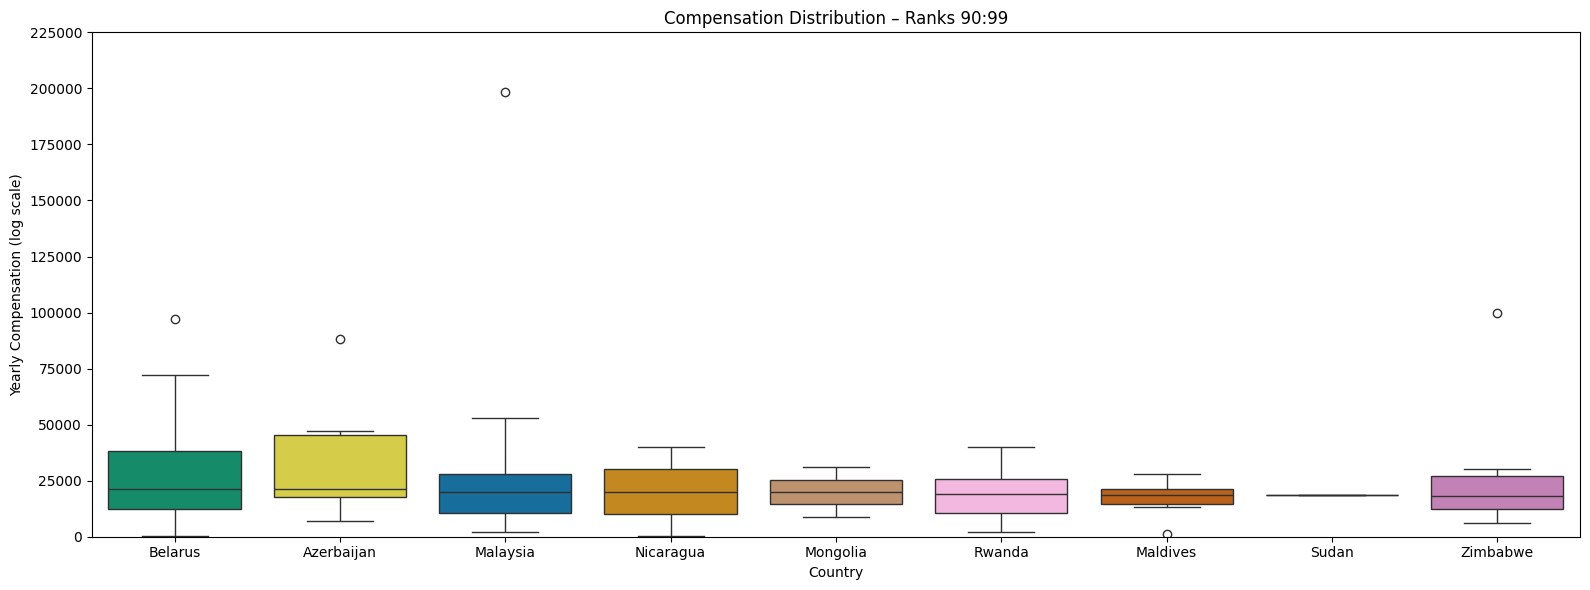

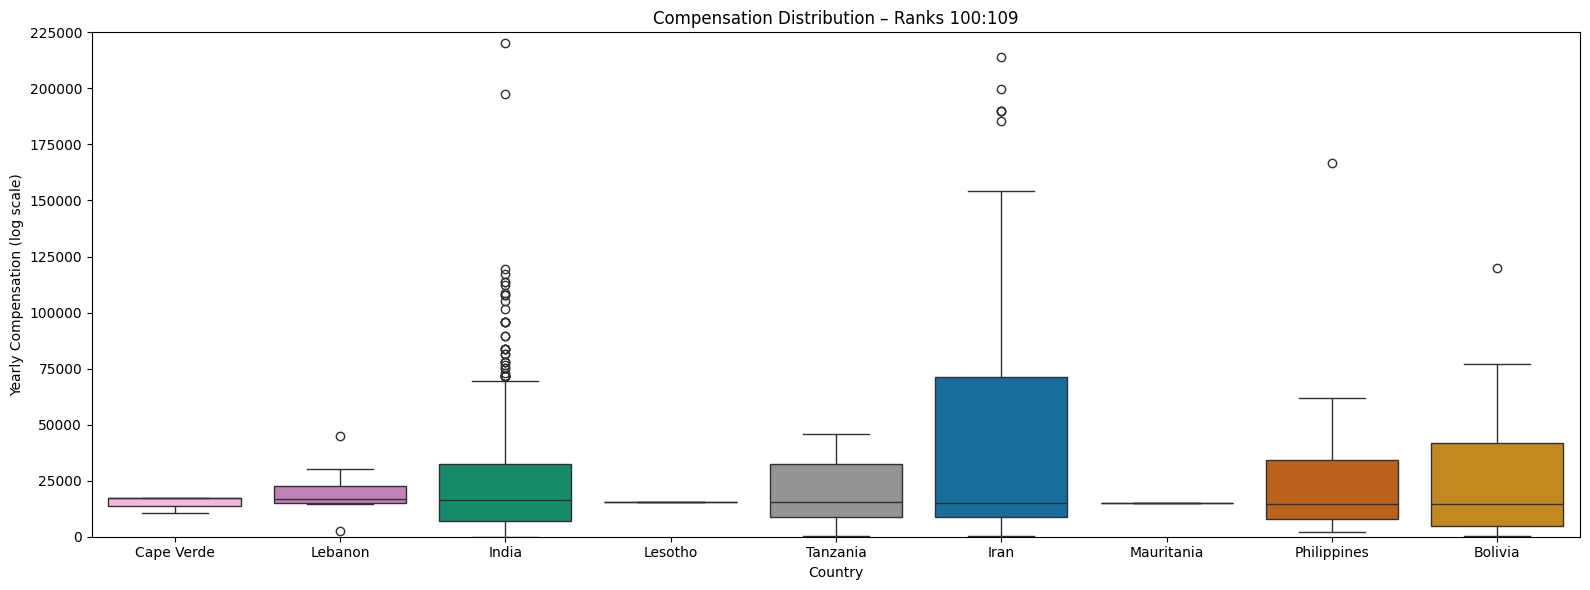

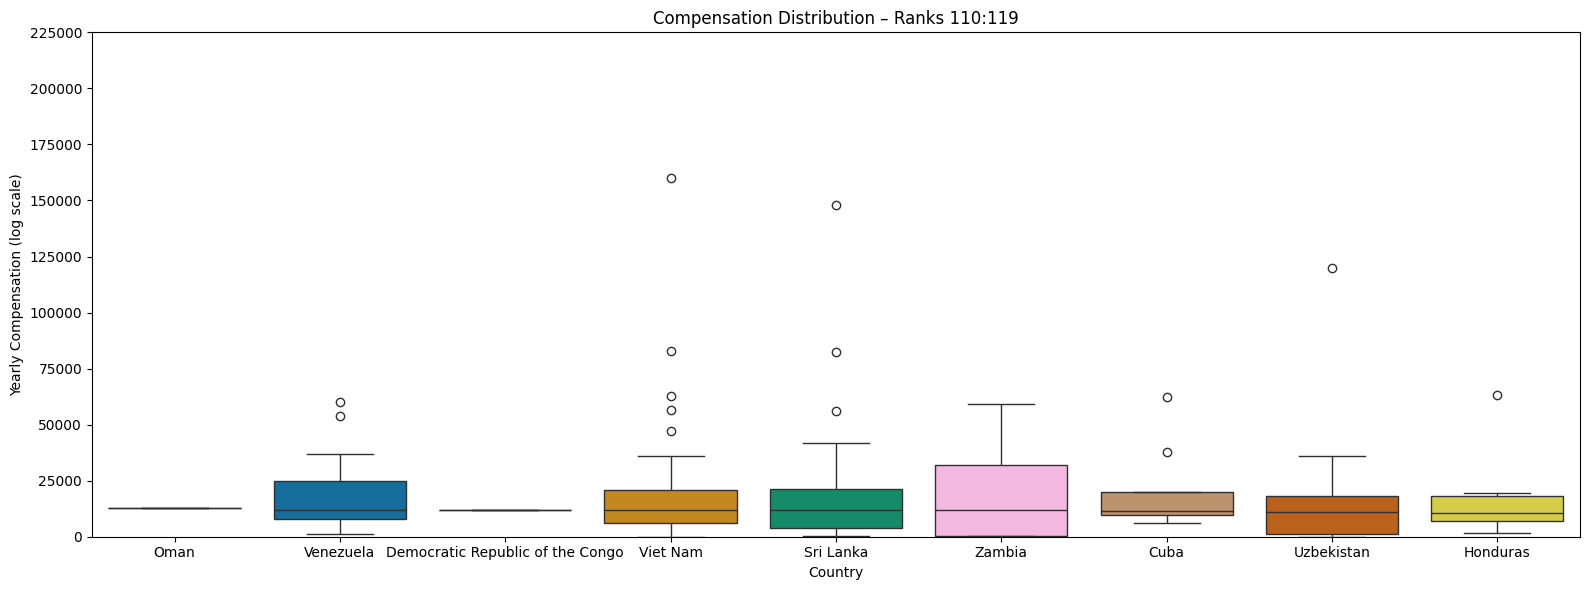

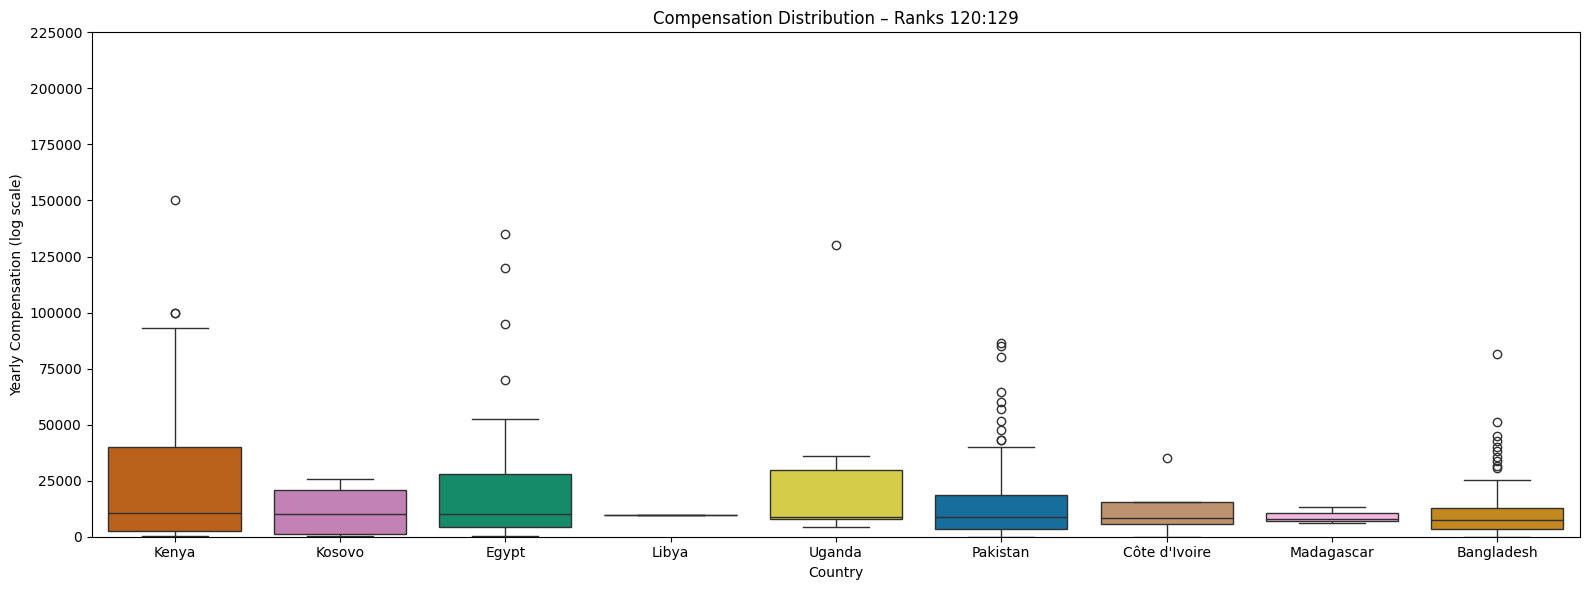

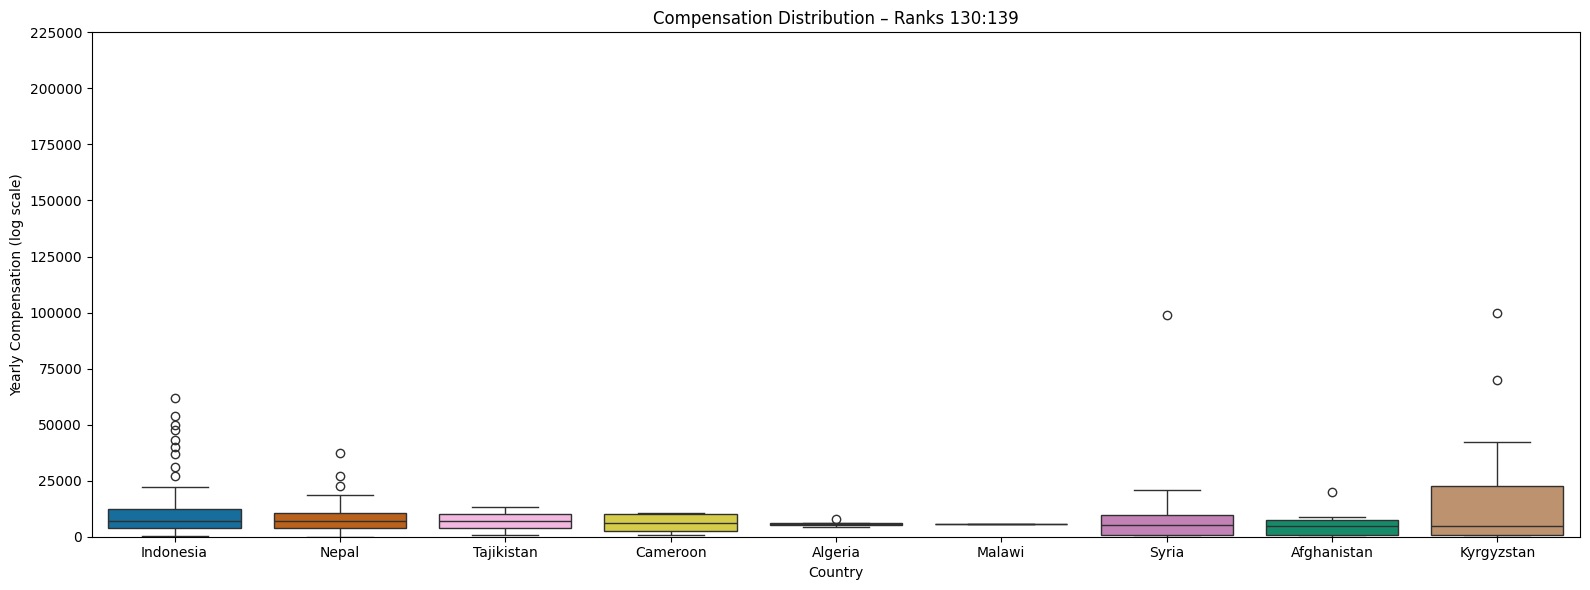

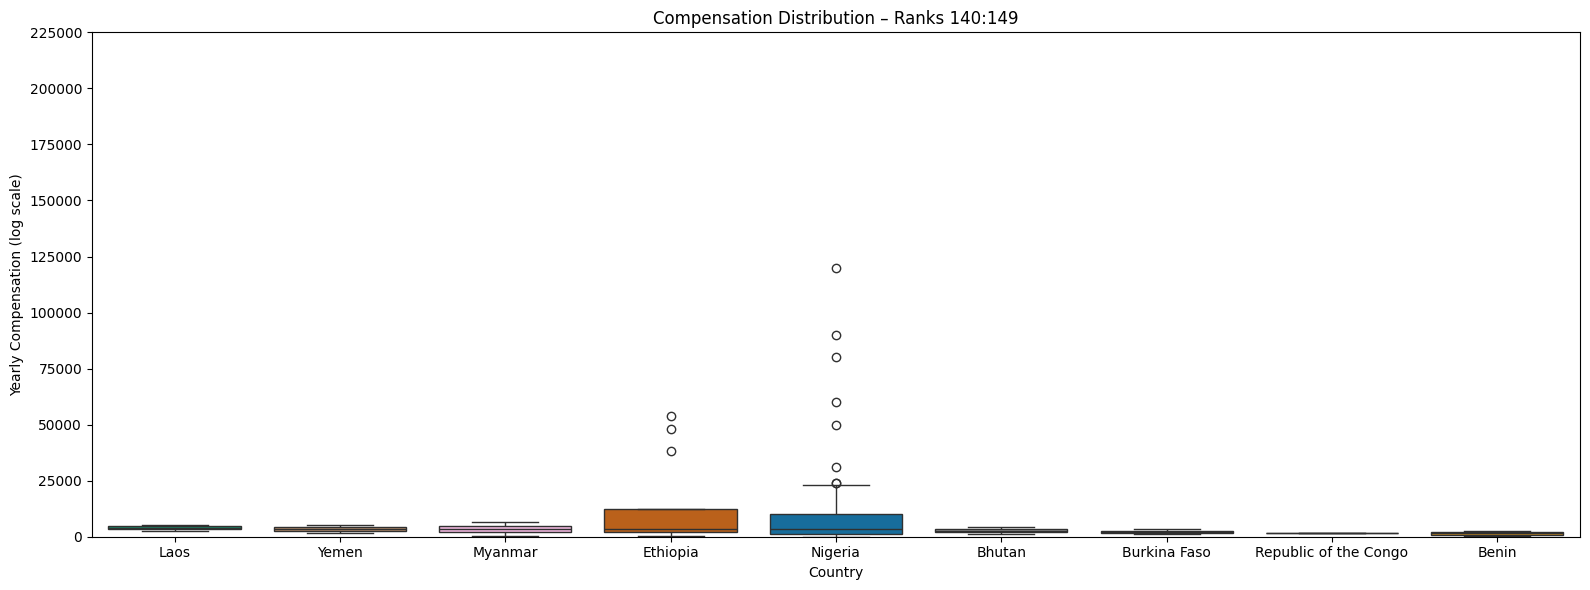

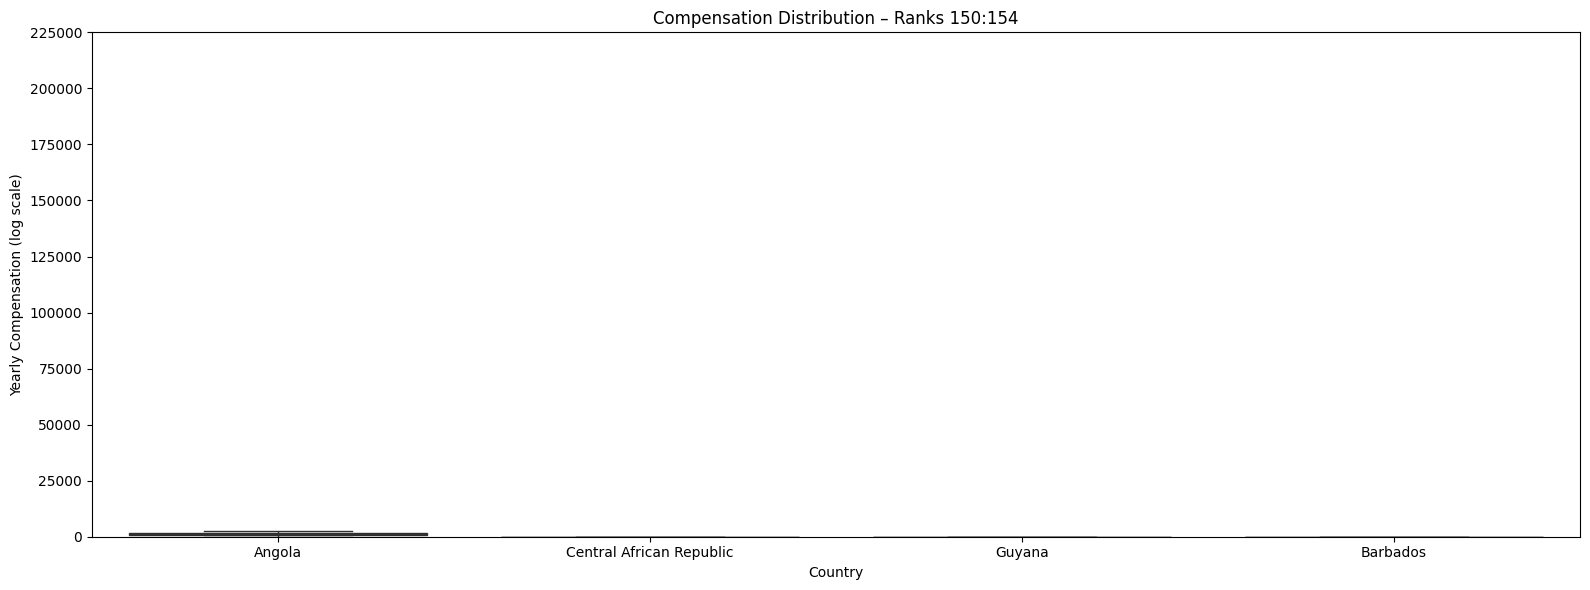

In [68]:
# Defining plotting function for each group
def plot_group_dict(df, countries_dict):
    group_label, countries = list(countries_dict.items())[0]

    plt.figure(figsize=(16, 6))
    sns.boxplot(
        data=df[df['Country'].isin(countries)],
        x='Country',
        y='ConvertedCompYearly',
        order=countries,
        showfliers=True,
        hue='Country',
        palette='colorblind',
    )
    # plt.yscale('log')
    # plt.xticks(rotation=15, ha='right')
    plt.xlabel('Country')
    plt.ylabel('Yearly Compensation (log scale)')
    plt.ylim(0, 225000)
    plt.title(f'Compensation Distribution – Ranks {group_label}')
    plt.tight_layout()
    plt.show()

plot_group_dict(df, group1)
plot_group_dict(df, group2)
plot_group_dict(df, group3)
plot_group_dict(df, group4)
plot_group_dict(df, group5)
plot_group_dict(df, group6)
plot_group_dict(df, group7)
plot_group_dict(df, group8)
plot_group_dict(df, group9)
plot_group_dict(df, group10)
plot_group_dict(df, group11)
plot_group_dict(df, group12)
plot_group_dict(df, group13)
plot_group_dict(df, group14)
plot_group_dict(df, group15)
plot_group_dict(df, group16)

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


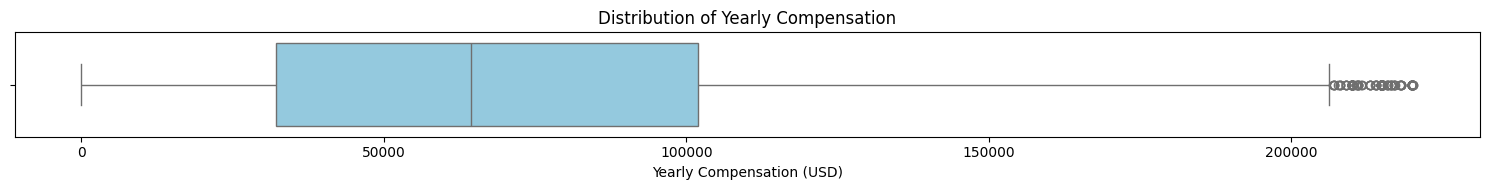

In [85]:
# Box plot of ConvertedCompYearly
plt.figure(figsize=(15, 2))
sns.boxplot(
    data=df,
    x='ConvertedCompYearly',
    color='skyblue'
)

plt.xlabel('Yearly Compensation (USD)')
plt.title('Distribution of Yearly Compensation')
plt.tight_layout()
plt.show()

In [86]:
# Filter out outliers
q3 = df["ConvertedCompYearly"].quantile(0.75)
q1 = df["ConvertedCompYearly"].quantile(0.25)
iqr = q3 - q1
lower_bound = max(q1 - 1.5 * iqr, 0)
upper_bound = q3 + 1.5 * iqr
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

df_refined = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)].copy()

print(f"Original size: {len(df):,}")
print(f"Refined size: {len(df_refined):,}")
print(f"Removed rows: {len(df) - len(df_refined):,}")

Lower Bound: 0
Upper Bound: 206442.0
Original size: 15,437
Refined size: 15,283
Removed rows: 154


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [96]:
df_corr = df_refined[["ConvertedCompYearly", "WorkExp", "JobSatPoints_1"]].dropna()
corr = df_corr.corr(method='pearson')
corr

,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.000000,0.404173,-0.063440
WorkExp,0.404173,1.000000,-0.035077
JobSatPoints_1,-0.063440,-0.035077,1.000000


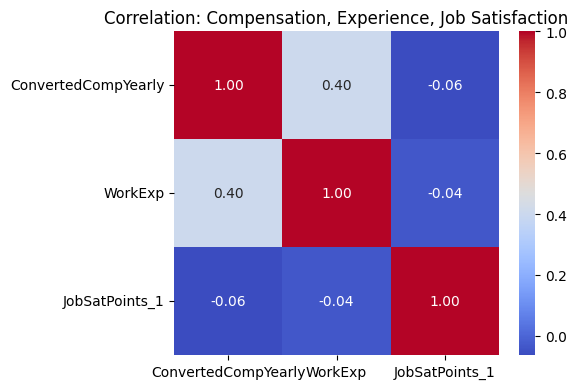

In [100]:
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    data=corr,
    annot=True,        # show correlation values
    fmt=".2f",         # 2 decimal places
    cmap='coolwarm',   # diverging colour map
    cbar=True
)
plt.title('Correlation: Compensation, Experience, Job Satisfaction')
plt.tight_layout()
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


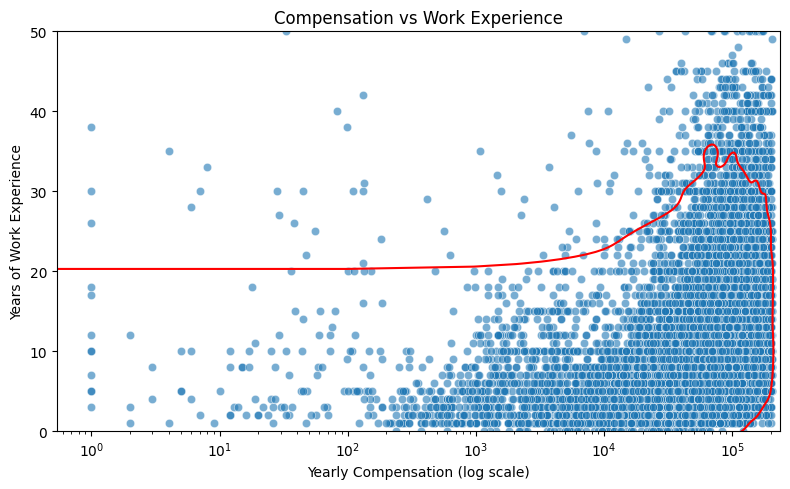

In [112]:
# ConvertedCompYearly vs WorkExp
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_refined,
    x='ConvertedCompYearly',
    y='WorkExp',
    alpha=0.6,
)
sns.kdeplot(
    data=df_refined,
    x='ConvertedCompYearly',
    y='WorkExp',
    fill=False,
    color='red',
    levels=1,   # number of contour levels
    thresh=0.05
)


plt.xscale('log')  # handle skew in compensation
plt.xlabel('Yearly Compensation (log scale)')
plt.ylabel('Years of Work Experience')
plt.ylim(0,55)
plt.title('Compensation vs Work Experience')
plt.tight_layout()
plt.show()

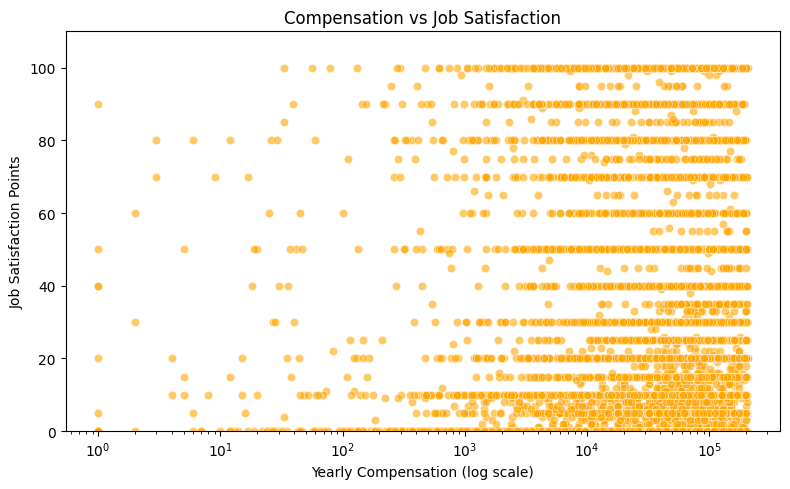

In [122]:
# ConvertedCompYearly vs JobSatPoints_1
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_refined,
    x='ConvertedCompYearly',
    y='JobSatPoints_1',
    alpha=0.6,
    color='orange'
)

plt.xscale('log')
plt.xlabel('Yearly Compensation (log scale)')
plt.ylabel('Job Satisfaction Points')
plt.ylim(0,110)
plt.title('Compensation vs Job Satisfaction')
plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
